# Evaluate the Harmony question matcher using the existing McElroy et al harmonisation tool as a gold standard

This is a validation of Harmony against the questionnaire harmonisation tool developed by McElroy et al in 2020.

You can read in detail about the validation report here:

https://harmonydata.org/measuring-the-performance-of-nlp-algorithms/

You can read an explanation of the technologies evaluated here:

https://harmonydata.org/how-does-harmony-work/

In [1]:
MODEL_NAME = "Model 3: Spacy Small Word Vectors separate EN+PT models"

import sys
sys.path.append("../front_end")
from utils.question_matcher_spacy import QuestionMatcherSpacy
qm = QuestionMatcherSpacy()
match_function = lambda question_dfs : qm.match_questions(question_dfs)

In [2]:
from IPython.display import display, HTML
import bz2
import os
import pickle as pkl
import re
import sys
from nltk.corpus import stopwords
from langdetect import detect
import numpy as np
import operator 
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from utils.spacy_wrapper import get_spacy_model

pd.set_option("max_colwidth", None)
pd.set_option("max_seq_items", None)

In [3]:
INPUT_FILE = "../data/Final harmonised item tool EM.xlsx"


In [4]:
def normalise_question(original_text: str):
    """
    Checks if two questions have identical text.
    This is because they are by definition equivalent even if they are in different columns in the harmonisation tool by McElroy et al.
    """
    return re.sub(r'\W', '', original_text.lower())

In [5]:
validation_data = {}

for sheet_name in ("Childhood","Adulthood"):

    df = pd.read_excel(INPUT_FILE, sheet_name=sheet_name)

    if sheet_name == "Adulthood":
        labels_in_this_sheet = ["Adulthood"] * len(df)
        df = df[df.columns[4:]]
    else:
        labels_in_this_sheet = list(df["Developmental period"])
        df = df[df.columns[5:]]

    all_questions = []
    category_to_id = {}
    for idx in range(0, len(df)):
        questions_in_survey = []
        for column in df.columns:
            cell_content = df[column].iloc[idx]
            if type(cell_content) is str:
                for text in cell_content.split("/"):
                    text = re.sub(r'[^A-Za-z -,]', '', text.strip()).strip()
                    category = column.strip()
                    if category not in category_to_id:
                        category_to_id[category] = len(category_to_id)
                    category_id = category_to_id[category]
                    if len(text) > 2:
                        
                        questions_in_survey.append((text, category_id, normalise_question(text)))
        all_questions.append(questions_in_survey)
    
    validation_data[sheet_name] = all_questions

In [6]:
validation_data["GAD-7"] = [[], []]
for en, pt in zip("""Feeling nervous, anxious, or on edge
Not being able to stop or control worrying
Worrying too much about different things
Trouble relaxing
Being so restless that it is hard to sit still
Becoming easily annoyed or irritable
Feeling afraid, as if something awful might happen""".split("\n"),
"""Sentir-se nervoso/a, ansioso/a ou muito tenso/a
Não ser capaz de impedir ou de controlar as preocupações
Preocupar-se muito com diversas coisas
Dificuldade para relaxar
Ficar tão agitado/a que se torna difícil permanecer sentado/a
Ficar facilmente aborrecido/a ou irritado/a
Sentir medo como se algo horrível fosse acontecer""".split("\n")
                 ):
    validation_data["GAD-7"][0].append((en, en, normalise_question(en)))
    validation_data["GAD-7"][1].append((pt, en, normalise_question(pt)))

Validating on dataset Childhood
	Processing 47 instruments of average length 23 questions each


/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/projects_client/wellcome/harmony/notebooks/../front_end/utils/question_matcher_spacy.py:33: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  pairwise_similarity = transforms[i].iloc[ii].similarity(transforms[j].iloc[jj])


	Calculated 562315 match scores
	Generated 562315 gold-standard values to compare them to
	Calculating ROC curve

FALSE NEGATIVES OR WEAKEST MATCHES Childhood



,Instrument 1,Instrument 2,Score from model,Ground truth
0,She is always on the go,"Extremely energetic, never tired""",0.0,1
1,She is always on the go,"Extremely energetic, never tired""",0.0,1
2,She is always on the go,"Extremely energetic, never tired""",0.0,1
3,She is always on the go,"Extremely energetic, never tired""",0.0,1
4,She is always on the go,"Extremely energetic, never tired""",0.0,1
5,She is always on the go,"Extremely energetic, never tired""",0.0,1
6,She is very energentic,"Squirmy, fidgety child",0.0,1
7,She is very energentic,"Squirmy, fidgety child",0.0,1
8,She is very energentic,"Squirmy, fidgety child",0.0,1
9,"Often appears miserable, unhappy, tearful or distressed",Child laughs a lot,0.0,1



FALSE POSITIVES OR WEAKEST REJECTIONS Childhood



,Instrument 1,Instrument 2,Score from model,Ground truth
0,I laughed a lot,I cried a lot,0.95,0
1,I cried a lot,I laughed a lot,0.95,0
2,I laughed a lot,I cried a lot,0.95,0
3,I cried a lot,I laughed a lot,0.95,0
4,I laughed a lot,I cried a lot,0.95,0
5,I cried a lot,I laughed a lot,0.95,0
6,I laughed a lot,I cried a lot,0.95,0
7,I cried a lot,I laughed a lot,0.95,0
8,I laughed a lot,I cried a lot,0.95,0
9,I cried a lot,I laughed a lot,0.95,0


Validating on dataset Adulthood
	Processing 28 instruments of average length 16 questions each


/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/projects_client/wellcome/harmony/notebooks/../front_end/utils/question_matcher_spacy.py:33: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  pairwise_similarity = transforms[i].iloc[ii].similarity(transforms[j].iloc[jj])


	Calculated 96017 match scores
	Generated 96017 gold-standard values to compare them to
	Calculating ROC curve

FALSE NEGATIVES OR WEAKEST MATCHES Adulthood



,Instrument 1,Instrument 2,Score from model,Ground truth
0,"Do you often feel on edge, or keyed up, or mentally tense or strained (rate nervous tension)",Found everything getting on top of you,0.01,1
1,"Do you often feel on edge, or keyed up, or mentally tense or strained (rate nervous tension)",Found everything getting on top of you,0.01,1
2,"Do you often feel on edge, or keyed up, or mentally tense or strained (rate nervous tension)",Found everything getting on top of you,0.01,1
3,Do you feel tired most of the time,exhaustion),0.01,1
4,exhaustion),Do you feel tired most of the time,0.01,1
5,exhaustion),Do you feel tired most of the time,0.01,1
6,exhaustion),Do you feel tired most of the time,0.01,1
7,exhaustion),Do you feel tired most of the time,0.01,1
8,I laughed a lot,been feeling unhappy and depressed,0.02,1
9,I laughed a lot,been feeling unhappy and depressed,0.02,1



FALSE POSITIVES OR WEAKEST REJECTIONS Adulthood



,Instrument 1,Instrument 2,Score from model,Ground truth
0,Have you been a happy person,Have you been a very nervous person,0.89,0
1,Have you been a very nervous person,Have you been a happy person,0.89,0
2,Have you been a happy person,Have you been a very nervous person,0.89,0
3,Have you been a very nervous person,Have you been a happy person,0.89,0
4,Have you been a happy person,Have you been a very nervous person,0.89,0
5,Have you been a very nervous person,Have you been a happy person,0.89,0
6,Have you been a happy person,Have you been a very nervous person,0.89,0
7,Have you been a very nervous person,Have you been a happy person,0.89,0
8,Have you been a happy person,Have you been a very nervous person,0.89,0
9,Have you been a very nervous person,Have you been a happy person,0.89,0


Validating on dataset GAD-7
Found GAD-7 Portuguese
	Processing 2 instruments of average length 7 questions each
	Calculated 49 match scores
	Generated 49 gold-standard values to compare them to
	Calculating ROC curve

FALSE NEGATIVES OR WEAKEST MATCHES GAD-7



/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/projects_client/wellcome/harmony/notebooks/../front_end/utils/question_matcher_spacy.py:33: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  pairwise_similarity = transforms[i].iloc[ii].similarity(transforms[j].iloc[jj])


,Instrument 1,Instrument 2,Score from model,Ground truth
0,Becoming easily annoyed or irritable,Ficar facilmente aborrecido/a ou irritado/a,0.01,1
1,Not being able to stop or control worrying,Não ser capaz de impedir ou de controlar as preocupações,0.08,1
2,Being so restless that it is hard to sit still,Ficar tão agitado/a que se torna difícil permanecer sentado/a,0.08,1
3,"Feeling nervous, anxious, or on edge","Sentir-se nervoso/a, ansioso/a ou muito tenso/a",0.12,1
4,"Feeling afraid, as if something awful might happen",Sentir medo como se algo horrível fosse acontecer,0.14,1
5,Worrying too much about different things,Preocupar-se muito com diversas coisas,0.15,1
6,Trouble relaxing,Dificuldade para relaxar,0.19,1



FALSE POSITIVES OR WEAKEST REJECTIONS GAD-7



,Instrument 1,Instrument 2,Score from model,Ground truth
0,Trouble relaxing,Sentir medo como se algo horrível fosse acontecer,0.40,0
1,Being so restless that it is hard to sit still,Dificuldade para relaxar,0.30,0
2,Becoming easily annoyed or irritable,Não ser capaz de impedir ou de controlar as preocupações,0.29,0
3,Becoming easily annoyed or irritable,Dificuldade para relaxar,0.26,0
4,Worrying too much about different things,Dificuldade para relaxar,0.23,0
5,Trouble relaxing,Ficar tão agitado/a que se torna difícil permanecer sentado/a,0.21,0
6,"Feeling nervous, anxious, or on edge",Preocupar-se muito com diversas coisas,0.19,0
7,Not being able to stop or control worrying,Dificuldade para relaxar,0.18,0
8,Not being able to stop or control worrying,Sentir medo como se algo horrível fosse acontecer,0.17,0
9,Trouble relaxing,Não ser capaz de impedir ou de controlar as preocupações,0.16,0


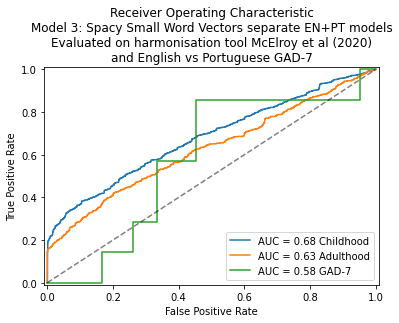

In [7]:
for dataset, dataset_data in validation_data.items():
    print (f"Validating on dataset {dataset}")
    question_dfs = []
    for questionnaire in dataset_data:
        df = pd.DataFrame({"question": [q for q, c, n in questionnaire]})
        df.attrs['language'] = "en"
        if dataset == "GAD-7" and "Sentir" in questionnaire[0][0]:
            df.attrs['language'] = "pt"
            print ("Found GAD-7 Portuguese")
        question_dfs.append(df)
    
    print (f"\tProcessing {len(question_dfs)} instruments of average length {int(np.round(np.mean([len(d) for d in question_dfs])))} questions each")
    matches = match_function(question_dfs)
    
    print (f"\tCalculated {len(matches)} match scores")
    
    gold_standard = {}
    for i in range(len(dataset_data)):
        for j in range(i + 1, len(dataset_data)):
            for ii in range(len(dataset_data[i])):
                for jj in range(len(dataset_data[j])):
                    gold_standard[(i, ii, j, jj)] = int(
                        (dataset_data[i][ii][1] == dataset_data[j][jj][1])
                        or 
                        (dataset_data[i][ii][2] == dataset_data[j][jj][2])
                    )
    
    print (f"\tGenerated {len(gold_standard)} gold-standard values to compare them to")
    
    print ("\tCalculating ROC curve")
    
    y_pred = []
    y_test = []
    for m, g in gold_standard.items():
        y_pred.append(abs(matches.get(m, 0)))
        y_test.append(g)

    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)

    plt.plot(fpr, tpr, label = f'AUC = {roc_auc:0.2f} {dataset}')
    
    print (f"\nFALSE NEGATIVES OR WEAKEST MATCHES {dataset}\n")

    all_positives = [m for m in gold_standard if gold_standard[m] == 1 ]
    estimated_values_for_gt_1 = dict([(m,abs(matches[m])) for m in all_positives ])

    ctr = 0    
    examples = []
    for match_tuple, score_from_model in sorted(estimated_values_for_gt_1.items(), key=operator.itemgetter(1)):
        examples.append((question_dfs[match_tuple[0]].question.iloc[match_tuple[1]], question_dfs[match_tuple[2]].question.iloc[match_tuple[3]], np.round(score_from_model, 2)))

        ctr += 1
        if ctr > 10:
            break
    df_examples = pd.DataFrame({"Instrument 1":[e[0] for e in examples],"Instrument 2":[e[1] for e in examples],"Score from model":[e[2] for e in examples]})
    df_examples["Ground truth"] = 1
    display(df_examples)
    

    print (f"\nFALSE POSITIVES OR WEAKEST REJECTIONS {dataset}\n")

    all_negatives = [m for m in gold_standard if gold_standard[m] == 0 ]
    estimated_values_for_gt_1 = dict([(m,abs(matches[m])) for m in all_negatives ])

    ctr = 0
    examples = []
    for match_tuple, score_from_model in sorted(estimated_values_for_gt_1.items(), key=operator.itemgetter(1), reverse=True):
        examples.append((question_dfs[match_tuple[0]].question.iloc[match_tuple[1]], question_dfs[match_tuple[2]].question.iloc[match_tuple[3]], np.round(score_from_model, 2)))

        ctr += 1
        if ctr > 10:
            break
    df_examples = pd.DataFrame({"Instrument 1":[e[0] for e in examples],"Instrument 2":[e[1] for e in examples],"Score from model":[e[2] for e in examples]})
    df_examples["Ground truth"] = 0
    display(df_examples)

            
plt.title(f'Receiver Operating Characteristic\n{MODEL_NAME}\nEvaluated on harmonisation tool McElroy et al (2020)\nand English vs Portuguese GAD-7')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'--', color='black', alpha=0.5)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()